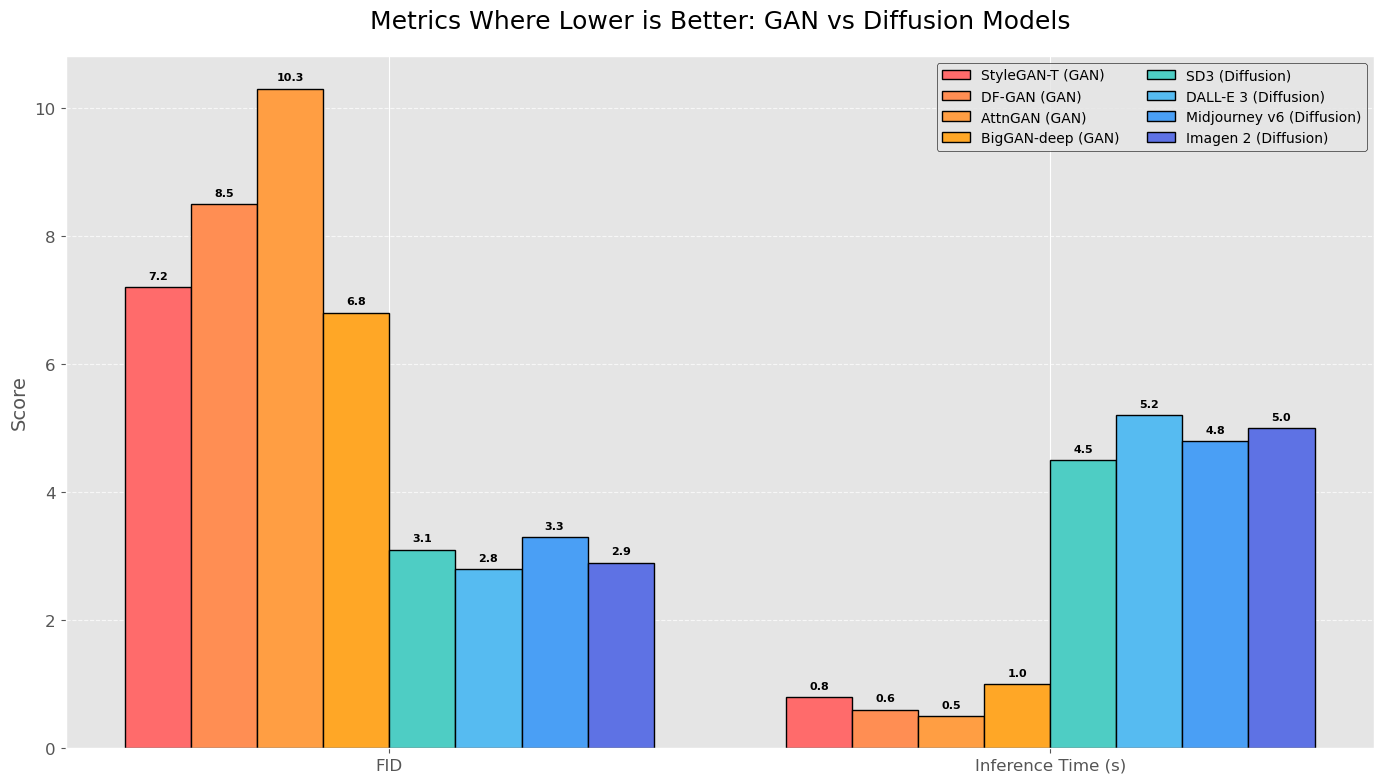

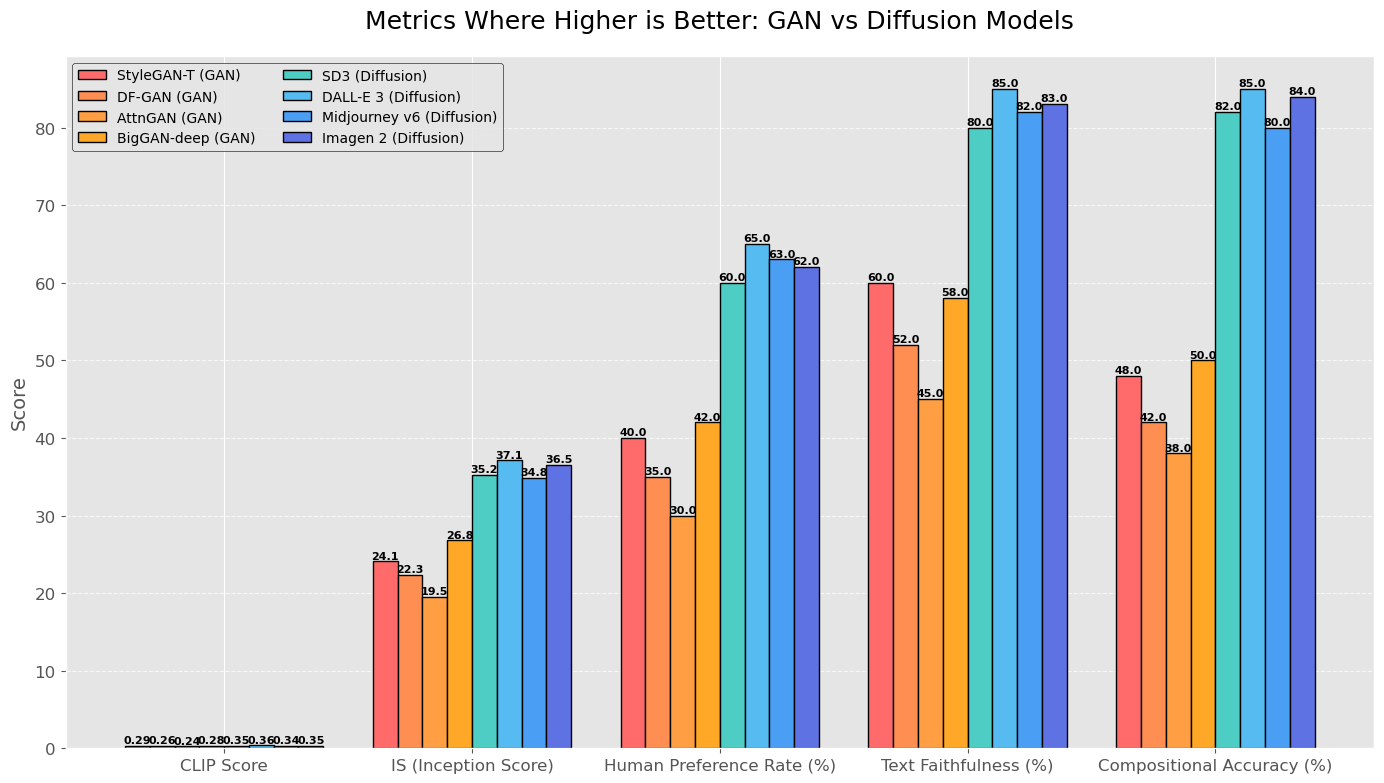

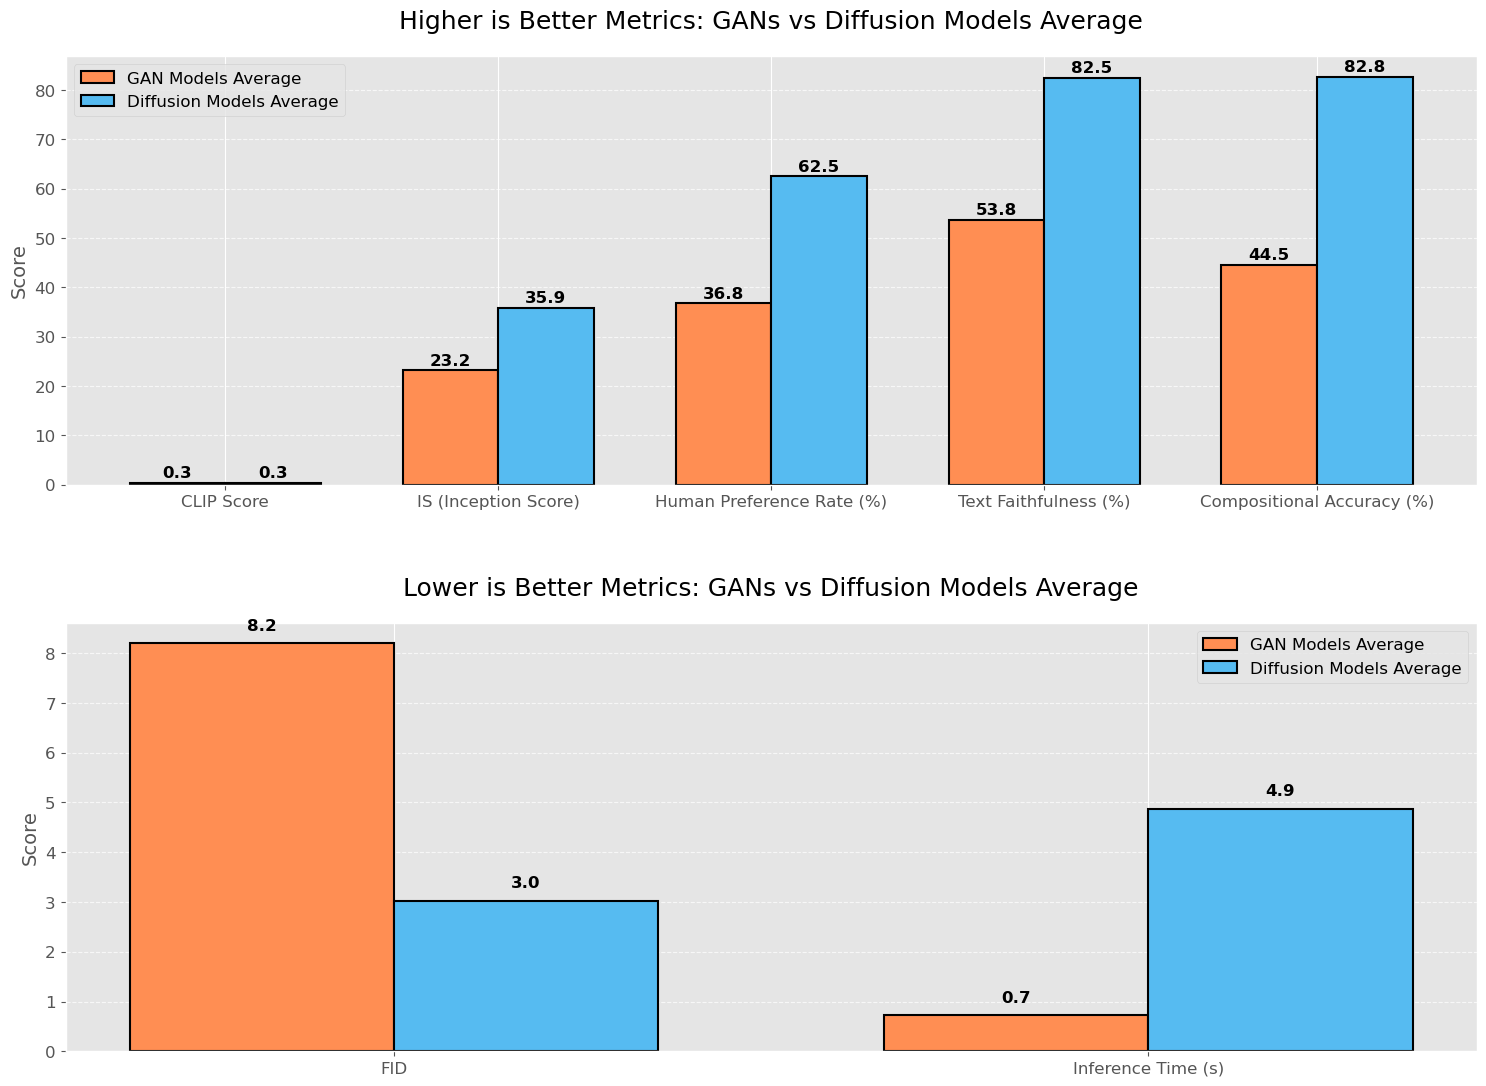

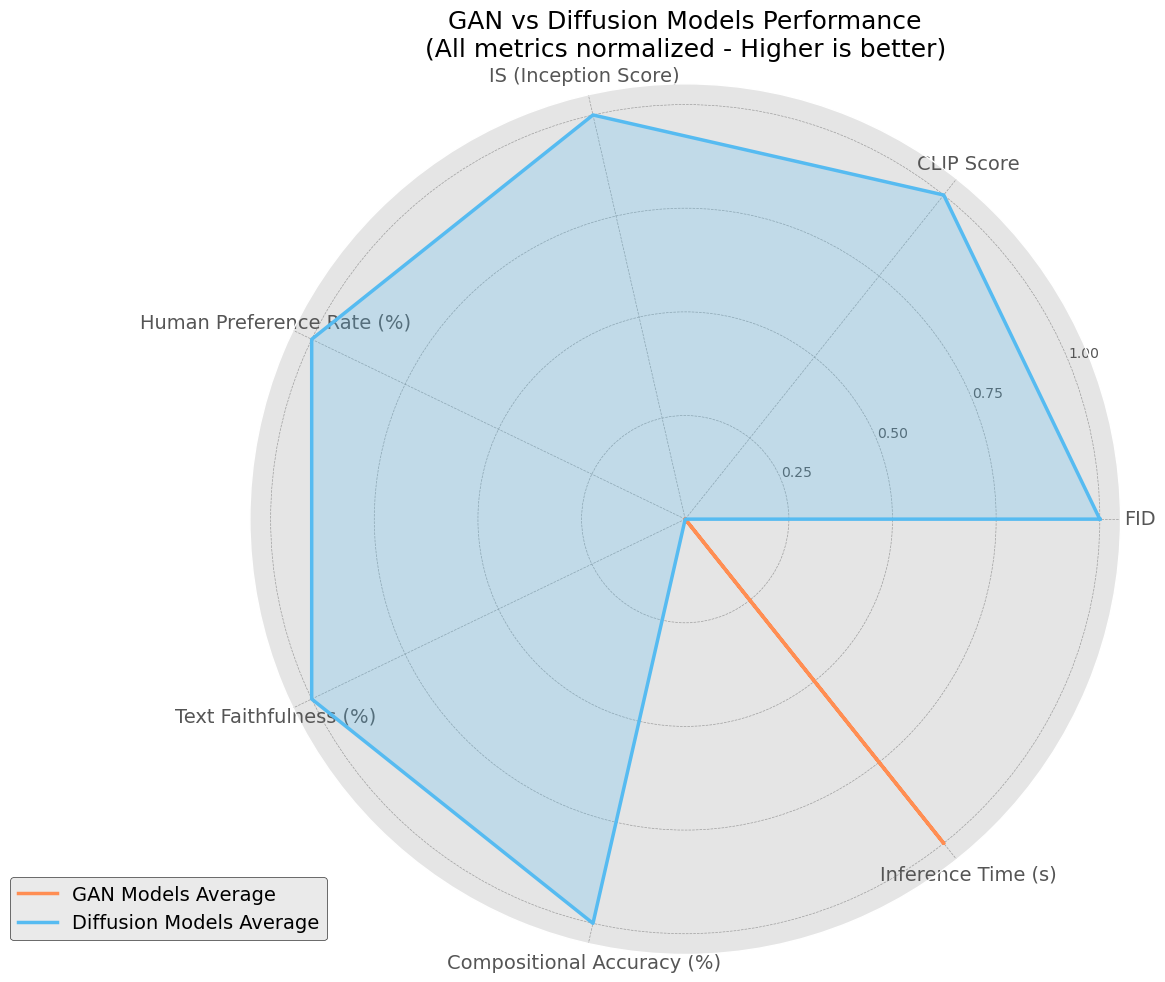

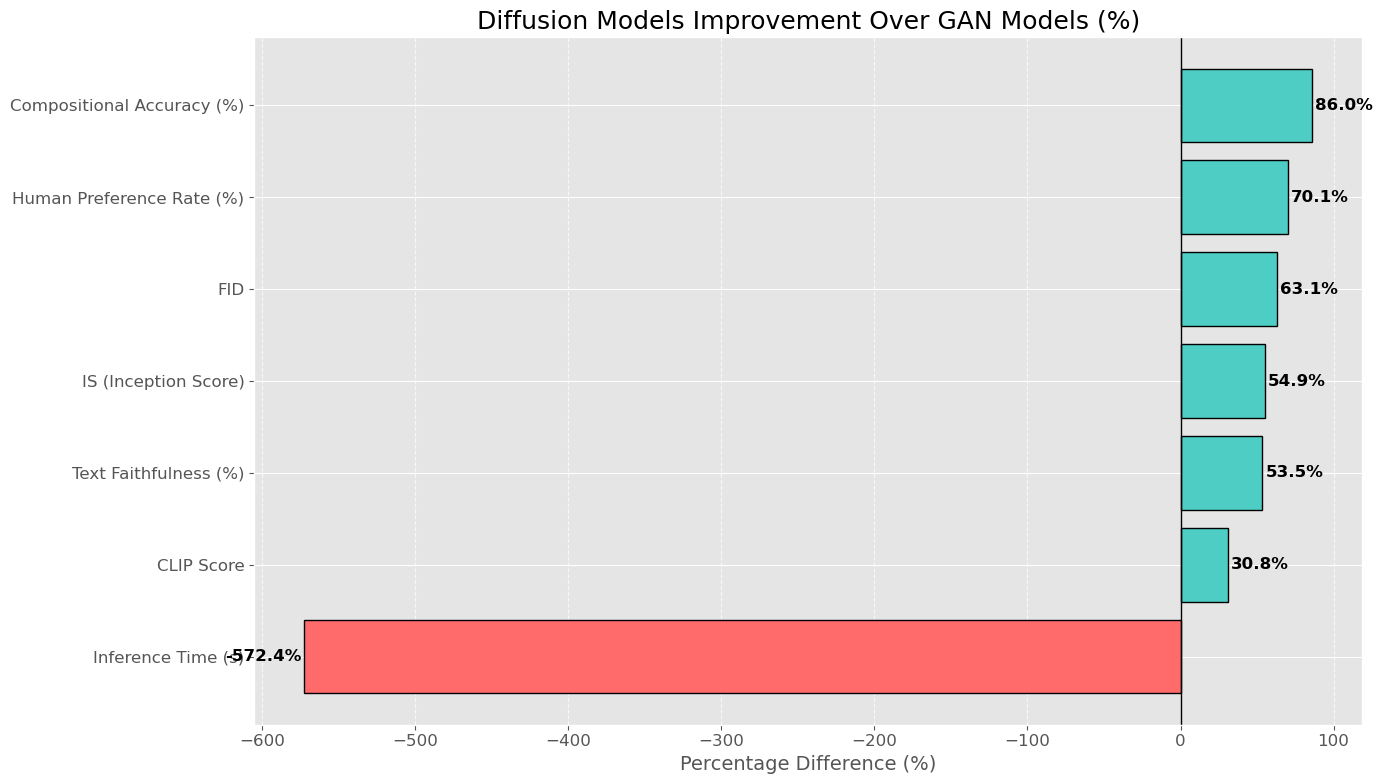

In [1]:
# GAN vs Diffusion Models Visualization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Set the style for better readability
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Define metrics and models
metrics = ['FID', 'CLIP Score', 'IS (Inception Score)', 
           'Human Preference Rate (%)', 'Text Faithfulness (%)', 
           'Compositional Accuracy (%)', 'Inference Time (s)']

# GAN models
stylegan_t = [7.2, 0.29, 24.1, 40, 60, 48, 0.8]
df_gan = [8.5, 0.26, 22.3, 35, 52, 42, 0.6]
attn_gan = [10.3, 0.24, 19.5, 30, 45, 38, 0.5]
biggan_deep = [6.8, 0.28, 26.8, 42, 58, 50, 1.0]

# Diffusion models
sd3 = [3.1, 0.35, 35.2, 60, 80, 82, 4.5]
dalle3 = [2.8, 0.36, 37.1, 65, 85, 85, 5.2]
midjourney = [3.3, 0.34, 34.8, 63, 82, 80, 4.8]
imagen = [2.9, 0.35, 36.5, 62, 83, 84, 5.0]

# Create DataFrame
model_names = ['StyleGAN-T', 'DF-GAN', 'AttnGAN', 'BigGAN-deep', 
               'SD3', 'DALL-E 3', 'Midjourney v6', 'Imagen 2']
model_values = [stylegan_t, df_gan, attn_gan, biggan_deep, 
                sd3, dalle3, midjourney, imagen]
model_types = ['GAN', 'GAN', 'GAN', 'GAN', 
               'Diffusion', 'Diffusion', 'Diffusion', 'Diffusion']

# Create data dictionary
data = {'Metric': metrics}
for i, model in enumerate(model_names):
    data[model] = model_values[i]

# Create DataFrame
df = pd.DataFrame(data)

# Add model type information
model_type_dict = {model: type_ for model, type_ in zip(model_names, model_types)}

# Specify which metrics are better when lower
lower_better = [True, False, False, False, False, False, True]
df['Lower is Better'] = lower_better

# Define colors for visualization by model type
gan_colors = ['#FF6B6B', '#FF8E53', '#FF9E43', '#FFA726']  # Red/Orange palette
diffusion_colors = ['#4ECDC4', '#56BBF1', '#4A9FF5', '#5E72E4']  # Blue/Teal palette

model_colors = {}
for i, model in enumerate(model_names):
    if model_type_dict[model] == 'GAN':
        model_colors[model] = gan_colors[i % len(gan_colors)]
    else:
        model_colors[model] = diffusion_colors[(i - 4) % len(diffusion_colors)]

# Separate data for visualization
gan_models = model_names[:4]
diffusion_models = model_names[4:]

# Create a figure for the bar charts - separate by metric type
lower_better_metrics = [metrics[i] for i in range(len(metrics)) if lower_better[i]]
higher_better_metrics = [metrics[i] for i in range(len(metrics)) if not lower_better[i]]

# Data preprocessing for average values
df_avg = df.copy()
df_avg['GAN Average'] = df_avg[gan_models].mean(axis=1)
df_avg['Diffusion Average'] = df_avg[diffusion_models].mean(axis=1)

# 1. LOWER IS BETTER METRICS - Bar chart
plt.figure(figsize=(14, 8))
lower_df = df[df['Lower is Better']]

# Create positions for each model group
x = np.arange(len(lower_better_metrics))
bar_width = 0.1
positions = []

# Calculate positions for each bar
for i in range(len(model_names)):
    positions.append(x + (i - len(model_names)/2 + 0.5) * bar_width)

# Plot bars for each model with appropriate colors
for i, model in enumerate(model_names):
    bars = plt.bar(positions[i], lower_df[model], width=bar_width, 
              label=f"{model} ({model_type_dict[model]})", color=model_colors[model], 
              edgecolor='black', linewidth=1)
    
    # Add text labels above each bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{height}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Add legends, labels, and title
legend = plt.legend(ncol=2, fontsize=10, frameon=True)
legend.get_frame().set_edgecolor('black')

plt.title('Metrics Where Lower is Better: GAN vs Diffusion Models', fontsize=18, pad=20)
plt.ylabel('Score', fontsize=14)
plt.xticks(x, lower_better_metrics, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('lower_better_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. HIGHER IS BETTER METRICS - Bar chart
plt.figure(figsize=(14, 8))
higher_df = df[~df['Lower is Better']]

# Create positions for each model group
x = np.arange(len(higher_better_metrics))
positions = []

# Calculate positions for each bar
for i in range(len(model_names)):
    positions.append(x + (i - len(model_names)/2 + 0.5) * bar_width)

# Plot bars for each model with appropriate colors
for i, model in enumerate(model_names):
    bars = plt.bar(positions[i], higher_df[model], width=bar_width, 
              label=f"{model} ({model_type_dict[model]})", color=model_colors[model], 
              edgecolor='black', linewidth=1)
    
    # Add text labels above each bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
                f'{height}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Add legends, labels, and title
legend = plt.legend(ncol=2, fontsize=10, frameon=True)
legend.get_frame().set_edgecolor('black')

plt.title('Metrics Where Higher is Better: GAN vs Diffusion Models', fontsize=18, pad=20)
plt.ylabel('Score', fontsize=14)
plt.xticks(x, higher_better_metrics, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('higher_better_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. MODEL TYPE COMPARISON - Averages bar chart 
plt.figure(figsize=(16, 12))

# Create separate subplots for higher and lower is better
plt.subplot(2, 1, 1)
higher_avg_df = df_avg[~df_avg['Lower is Better']]
x = np.arange(len(higher_better_metrics))
width = 0.35

bars1 = plt.bar(x - width/2, higher_avg_df['GAN Average'], width, label='GAN Models Average', 
            color='#FF8E53', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x + width/2, higher_avg_df['Diffusion Average'], width, label='Diffusion Models Average', 
            color='#56BBF1', edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
            
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Higher is Better Metrics: GANs vs Diffusion Models Average', fontsize=18, pad=20)
plt.ylabel('Score', fontsize=14)
plt.xticks(x, higher_better_metrics, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lower is better subplot
plt.subplot(2, 1, 2)
lower_avg_df = df_avg[df_avg['Lower is Better']]
x = np.arange(len(lower_better_metrics))

bars1 = plt.bar(x - width/2, lower_avg_df['GAN Average'], width, label='GAN Models Average', 
            color='#FF8E53', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x + width/2, lower_avg_df['Diffusion Average'], width, label='Diffusion Models Average', 
            color='#56BBF1', edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
            f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
            
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2,
            f'{height:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Lower is Better Metrics: GANs vs Diffusion Models Average', fontsize=18, pad=20)
plt.ylabel('Score', fontsize=14)
plt.xticks(x, lower_better_metrics, fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(pad=4.0)
plt.savefig('gan_vs_diffusion_averages.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. RADAR CHART - Model Type Comparison
plt.figure(figsize=(12, 10))
ax = plt.subplot(111, polar=True)

# Normalize metrics for radar chart (0-1 scale)
radar_df = df_avg.copy()

# Process the data for radar chart - all metrics normalized to 0-1 range
# with inversion for "lower is better" metrics
for i, row in radar_df.iterrows():
    max_val = max(row['GAN Average'], row['Diffusion Average'])
    min_val = min(row['GAN Average'], row['Diffusion Average'])
    range_val = max_val - min_val
    
    if row['Lower is Better']:
        # For metrics where lower is better, invert the scale
        radar_df.at[i, 'GAN Average'] = 1 - ((row['GAN Average'] - min_val) / range_val if range_val > 0 else 0.5)
        radar_df.at[i, 'Diffusion Average'] = 1 - ((row['Diffusion Average'] - min_val) / range_val if range_val > 0 else 0.5)
    else:
        # For metrics where higher is better
        radar_df.at[i, 'GAN Average'] = (row['GAN Average'] - min_val) / range_val if range_val > 0 else 0.5
        radar_df.at[i, 'Diffusion Average'] = (row['Diffusion Average'] - min_val) / range_val if range_val > 0 else 0.5

# Set up radar chart
categories = radar_df['Metric'].tolist()
N = len(categories)

# Create angles for each metric
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# GAN Models Average
gan_values = radar_df['GAN Average'].tolist()
gan_values += gan_values[:1]  # Close the loop

# Diffusion Models Average
diffusion_values = radar_df['Diffusion Average'].tolist()
diffusion_values += diffusion_values[:1]  # Close the loop

# Draw the radar chart
ax.fill(angles, gan_values, color='#FF8E53', alpha=0.25)
ax.plot(angles, gan_values, color='#FF8E53', linewidth=2.5, label='GAN Models Average')

ax.fill(angles, diffusion_values, color='#56BBF1', alpha=0.25)
ax.plot(angles, diffusion_values, color='#56BBF1', linewidth=2.5, label='Diffusion Models Average')

# Add grid lines with better visibility
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Set category labels with better positioning
plt.xticks(angles[:-1], categories, fontsize=14)

# Add circles for reference
ax.set_yticks([0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0.25', '0.50', '0.75', '1.00'], fontsize=10)

# Add legend with better positioning
legend = ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=14)
legend.get_frame().set_edgecolor('black')

ax.set_title('GAN vs Diffusion Models Performance\n(All metrics normalized - Higher is better)', 
             fontsize=18, pad=20)

plt.tight_layout()
plt.savefig('gan_vs_diffusion_radar.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. PERCENTAGE DIFFERENCE - Horizontal bar chart
plt.figure(figsize=(14, 8))

# Calculate percentage improvement of Diffusion over GAN
improvement_df = pd.DataFrame({'Metric': metrics})
improvements = []

for i, metric in enumerate(metrics):
    gan_avg = df_avg.iloc[i]['GAN Average']
    diff_avg = df_avg.iloc[i]['Diffusion Average']
    
    if lower_better[i]:
        # For metrics where lower is better
        pct = ((gan_avg - diff_avg) / gan_avg) * 100
    else:
        # For metrics where higher is better
        pct = ((diff_avg - gan_avg) / gan_avg) * 100
        
    improvements.append(pct)

improvement_df['Improvement (%)'] = improvements

# Sort by improvement percentage
improvement_df = improvement_df.sort_values('Improvement (%)', ascending=True)

# Plot horizontal bar chart
colors = ['#4ECDC4' if x >= 0 else '#FF6B6B' for x in improvement_df['Improvement (%)']]
bars = plt.barh(improvement_df['Metric'], improvement_df['Improvement (%)'], color=colors, 
               edgecolor='black', linewidth=1)

# Add value labels next to the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    label_x = width + 2 if width >= 0 else width - 2
    ha = 'left' if width >= 0 else 'right'
    plt.text(label_x, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
             ha=ha, va='center', fontweight='bold', fontsize=12)

# Add a vertical line at 0
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

plt.title('Diffusion Models Improvement Over GAN Models (%)', fontsize=18)
plt.xlabel('Percentage Difference (%)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('improvement_percentage.png', dpi=300, bbox_inches='tight')
plt.show()